# 정규성 검정
* 정규 분포를 따르는지 검정

ShapiroResult(statistic=0.9849168062210083, pvalue=0.10112646222114563)


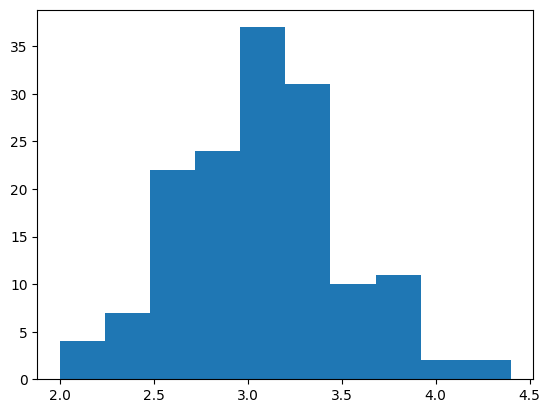

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
plt.hist(df['sepal_width'])
from scipy.stats import shapiro
print(shapiro(df['sepal_width']))



# 등분산 검정
* 각 데이터가 같은 분산을 가지는지(등분산) 검정

In [ ]:
df
from scipy.stats import bartlett
a = df.loc[df['species'] == 'setosa','sepal_length']
b = df.loc[df['species'] == 'versicolor', 'sepal_length']

bartlett(a,b)

BartlettResult(statistic=6.891726740802407, pvalue=0.008659557933880048)

# 두 집단 검정
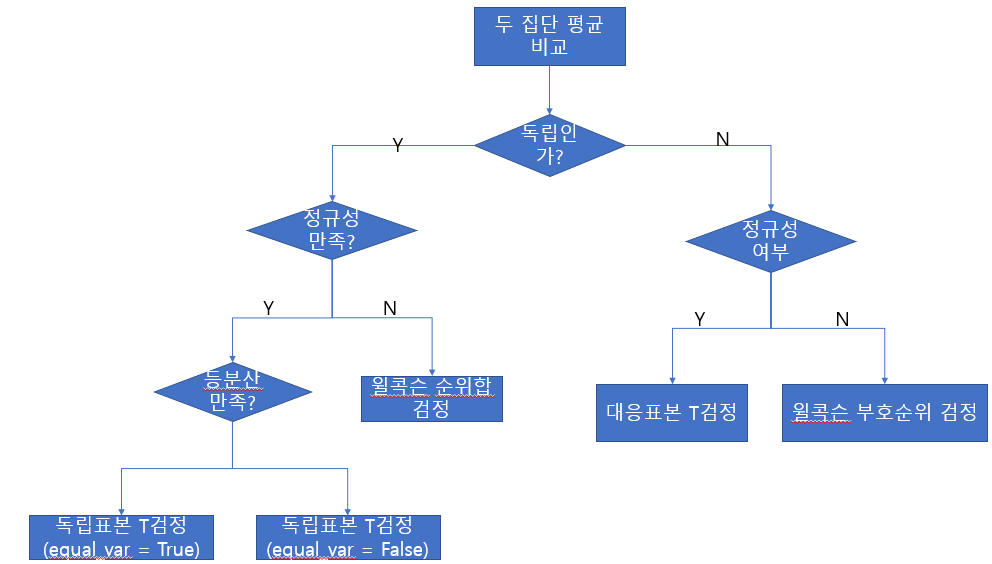

# T 검정 (평균값 검정)
가정 : 모집단이 정규분포를 이루고 종속변수가 연속형이다

* 일표본 T검정 (One sample T-Test)
  * 기준이 되는 평균값이 문제에 주어짐
  * 귀무가설(H0) : 모평균과 표본 평균이 같다.(차이가 없다)
  * 대립가설(H1) : 모평균과 표본 평균에 유의미한 차이가 있다.



### 1) anscombe데이터에서 x의 평균이 8.0점인지 통계적 검정을 수행하라. (단, 유의수준은 0.5)

In [ ]:
# anscombe 데이터에서 X의 평균이 8.0점인지 통계적 검정을 수행
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
data = sns.load_dataset('anscombe')
print('shapiro result : ', shapiro(data['x']))

#모평균
mean = 8.0
t_stat , p_value = stats.ttest_1samp(data['x'],mean)
print(p_value)

shapiro result :  ShapiroResult(statistic=0.9406659603118896, pvalue=0.024983162060379982)
0.04413626555962819




*   이표본 T 검정
  * 독립 T 검정 : 두 개의 독립된 그룹의 평균이 통계적으로 유의미하게 다른지 확인
     * 정규성, 등분산성 검정 필요
  * 대응표본 T검정 : 같은 집단의 두 조건에서의 평균을 비교하기 위해 사용
  <BR>
  1) A 평균 ≠ B 평균 (양측검정)
  <BR>
  2) A 평균 > B 평균 (우단측검정)
  <BR>
  3) A 평균 < B 평균 (좌단측검정)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
# 독립 T 검정
t_stat, p_value = stats.ttest_ind(data['x'], data['y'])#  alternative = 'greater' : 우단측 검정 / 'less' : 좌단측 검정

print(p_value)

0.00954231937757824


In [ ]:
# 대응 표본 T검정

import pandas as pd
from scipy.stats import ttest_rel

data = pd.read_csv('paired_t.csv')

data.head()
t_stat, p_val = ttest_rel(data['Before Treatment'],data['After Treatment'])
print(p_val)

0.033760144362093514


# 순위합 검정
* 두 독립 표본 간의 차이를 비교하는 비모수적 검정
* 두 집단 간의 위치 차이를 평가하기 위해 순위를 사용.

In [ ]:
# iris에서 setosa, versicolor의 꽃받침 길이 차이가 통계적으로 유의한지 검정
import seaborn as sns
iris = sns.load_dataset('iris')

setosa_sepal_length = iris.loc[iris['species'] == 'setosa', 'sepal_length']
versicolor_sepal_length = iris.loc[iris['species'] == 'versicolor', 'sepal_length']

from scipy.stats import ranksums
stat, p_value = ranksums(setosa_sepal_length, versicolor_sepal_length)
print(p_value)

8.941486415112091e-14


# Anova 테스트
### 일원분산분석(One-way ANOVA)
* 세 개 이상의 그룹 평균 간의 차이를 검정
* 각 샘플이 독립성, 정규성, 등분산성을 만족하는지 확인 필요


In [ ]:
import seaborn as sns
data = sns.load_dataset('diamonds')
from scipy import stats
f_stat, p_value = stats.f_oneway(data['x'],data['y'],data['z'])
print(p_value)


0.0


### 이원배치분산분석
* 두 개의 범주형 독립 변수와 한 개의 연속형 종속 변수 간의 평균차이를 분석하는 통계 방법

In [ ]:
!pip install pingouin

In [ ]:
!pip install scikit_posthocs

In [ ]:
import pingouin as pg
import scikit_posthocs

# 이원 배치 분산분석 모델
aov = pg.anova(data = data, dv='price', between = ['cut', 'color'], detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,cut,9.699679e+09,4.0,2.424920e+09,159.356253,7.880786e-136,0.011687
1,color,2.550704e+10,6.0,4.251174e+09,279.370558,0.000000e+00,0.030158
2,cut * color,1.653455e+09,24.0,6.889396e+07,4.527442,1.000780e-12,0.002012
3,Residual,8.202709e+11,53905.0,1.521697e+07,NaN,NaN,NaN


In [ ]:
posthoc1 = pg.pairwise_tukey(data = data, dv = 'price', between = 'cut')
posthoc1

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Ideal,Premium,3457.541970,4584.257704,-1126.715734,43.224592,-26.066544,0.000000,-0.279710
1,Ideal,Very Good,3457.541970,3981.759891,-524.217921,45.050188,-11.636309,0.000000,-0.135992
2,Ideal,Good,3457.541970,3928.864452,-471.322481,62.703206,-7.516721,0.000000,-0.124513
3,Ideal,Fair,3457.541970,4358.757764,-901.215794,102.411549,-8.799943,0.000000,-0.237674
4,Premium,Very Good,4584.257704,3981.759891,602.497814,49.393867,12.197826,0.000000,0.144782
5,Premium,Good,4584.257704,3928.864452,655.393253,65.893298,9.946281,0.000000,0.156623
6,Premium,Fair,4584.257704,4358.757764,225.499940,104.395211,2.160060,0.195059,0.052763
7,Very Good,Good,3981.759891,3928.864452,52.895439,67.104998,0.788249,0.934115,0.013688
8,Very Good,Fair,3981.759891,4358.757764,-376.997873,105.164224,-3.584849,0.003112,-0.096819
9,Good,Fair,3928.864452,4358.757764,-429.893312,113.849404,-3.775982,0.001499,-0.117700


In [ ]:
posthoc2 = pg.pairwise_tukey(data=data, dv = 'price', between = 'color')
posthoc2

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,D,E,3169.954096,3076.752475,93.201621,62.047242,1.502107,0.743743,0.027826
1,D,F,3169.954096,3724.886397,-554.932301,62.385265,-8.895246,0.000000,-0.153574
2,D,G,3169.954096,3999.135671,-829.181575,60.344704,-13.740751,0.000000,-0.217878
3,D,H,3169.954096,4486.669196,-1316.715100,64.287150,-20.481777,0.000000,-0.341665
4,D,I,3169.954096,5091.874954,-1921.920858,71.553080,-26.860072,0.000000,-0.477893
5,D,J,3169.954096,5323.818020,-2153.863924,88.132029,-24.439060,0.000000,-0.581089
6,E,F,3076.752475,3724.886397,-648.133922,56.478996,-11.475663,0.000000,-0.181620
7,E,G,3076.752475,3999.135671,-922.383196,54.216594,-17.012931,0.000000,-0.246661
8,E,H,3076.752475,4486.669196,-1409.916720,58.572975,-24.071113,0.000000,-0.374046
9,E,I,3076.752475,5091.874954,-2015.122479,66.466525,-30.317855,0.000000,-0.517798


# 카이제곱 검정
* 독립성 검정 : 두 범주형 변수 간의 독립성을 검정
* 동질성 검정 : 여러 집단이 동일한 분포를 따르는지를 검정
* 적합도 검정 : 관측된 빈도가 기대되는 분포와 얼마나 일치하는지 검정.

In [ ]:
import seaborn as sns
from scipy.stats import chi2_contingency
import pandas as pd

tips = sns.load_dataset('tips')
chi2, p, dof, expected = chi2_contingency(pd.crosstab(tips['day'],tips['smoker']))
print(p)
#


1.0567572499836523e-05


In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.info()

chi2, p, dof, expected = chi2_contingency(pd.crosstab(titanic['class'],titanic['embarked']))
print(p)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
8.435267819894384e-26


In [ ]:
import numpy as np
import scipy.stats as stats

observed = np.array([8,9,10,10,11,12])
expected = np.array([10,10,10,10,10,10])

chi2, p = stats.chisquare(f_obs = observed, f_exp = expected)
print(p)

0.9625657732472964
